The following code imports all the libraries needed for the tasks we need to do.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We create the variable CSV with we will work. 

In [35]:
df = pd.read_csv("C:\\Users\\jhonn\OneDrive\\Datasets\\seattle-weather.csv")

We converted the column 'DATE' the object type to datetime type.

In [36]:
df['date'] = pd.to_datetime(df['date'])
df = df[['date', 'temp_max', 'temp_min', 'precipitation', 'wind', 'weather' ]]
df.head()

,date,temp_max,temp_min,precipitation,wind,weather
0,2012-01-01,12.8,5.0,0.0,4.7,drizzle
1,2012-01-02,10.6,2.8,10.9,4.5,rain
2,2012-01-03,11.7,7.2,0.8,2.3,rain
3,2012-01-04,12.2,5.6,20.3,4.7,rain
4,2012-01-05,8.9,2.8,1.3,6.1,rain


To be able to use the function .query() we first to check each columns for blank rows.

In [37]:
df.isnull().sum()

date             0
temp_max         0
temp_min         0
precipitation    0
wind             0
weather          0
dtype: int64

We created a variable with the .query() function, change the name and order columns according to our criteria.

In [38]:
df_12 = df.query('date < 2013').set_index('date')
df_12 = df_12[['temp_min','temp_max','wind','precipitation','weather']]
df_12.rename(columns={'wind':'wind_speed'}, inplace=True)
df_12.head()

,temp_min,temp_max,wind_speed,precipitation,weather
date,,,,,
2012-01-01,5.0,12.8,4.7,0.0,drizzle
2012-01-02,2.8,10.6,4.5,10.9,rain
2012-01-03,7.2,11.7,2.3,0.8,rain
2012-01-04,5.6,12.2,4.7,20.3,rain
2012-01-05,2.8,8.9,6.1,1.3,rain


We created a list with the minimum temperature of each month in each year from 2012 to 2015.

In [39]:
year = 2012
temp = 0 
month = 1
temp_avg_min = []
count = 0

for _,j in df.iterrows():
    
    if j.date.month == month and j.date.year == year:
        count += 1
        temp += j.temp_min
      
    elif j.date.month != month and j.date.year == year:
        count += 1
        temp_avg_min.append(round(temp / count, 2))
        count = 0
        month += 1        
        temp = 0        
        temp += j.temp_min        
    else:
        count += 1
        temp_avg_min.append(round(temp / count, 2))
        count = 0
        month = 1        
        temp = 0        
        temp += j.temp_min        
        year += 1
        
temp_avg_min.append(round(temp / count, 2))
temp_avg_min = np.array(temp_avg_min)
temp_avg_min = temp_avg_min.reshape(4, 12)
print(temp_avg_min)



[[ 1.49  3.2   2.84  5.99  8.19 10.48 12.93 14.01 11.24  8.38  5.23  3.29]
 [ 0.8   4.33  4.98  6.7   9.92 13.16 13.93 15.48 13.59  7.64  5.59  1.57]
 [ 4.1   2.64  5.43  6.73 10.22 11.76 14.43 14.89 13.23 10.88  4.51  4.61]
 [ 4.35  6.09  6.19  6.03 10.13 13.58 15.5  14.69 11.37 10.5   3.48  3.95]]


We created the new dataframe with we wiil work.

In [40]:
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_min = pd.DataFrame(months_list)
z = { '2012':temp_avg_min[0],'2013':temp_avg_min[1], '2014':temp_avg_min[2], '2015':temp_avg_min[3] }
df_min = df_min.assign(**z)
df_min.rename(columns={0:'Month'}, inplace=True)
print(df_min)

        Month   2012   2013   2014   2015
0     January   1.49   0.80   4.10   4.35
1    February   3.20   4.33   2.64   6.09
2       March   2.84   4.98   5.43   6.19
3       April   5.99   6.70   6.73   6.03
4         May   8.19   9.92  10.22  10.13
5        June  10.48  13.16  11.76  13.58
6        July  12.93  13.93  14.43  15.50
7      August  14.01  15.48  14.89  14.69
8   September  11.24  13.59  13.23  11.37
9     October   8.38   7.64  10.88  10.50
10   November   5.23   5.59   4.51   3.48
11   December   3.29   1.57   4.61   3.95


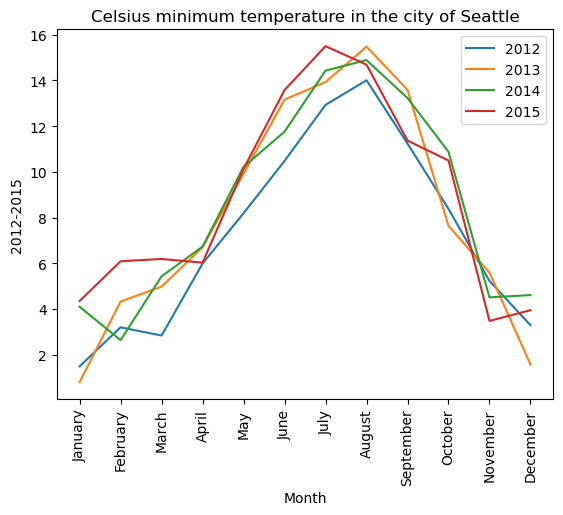

In [41]:
sns.lineplot(data=df_min, x='Month', y='2012', label='2012')
sns.lineplot(data=df_min, x='Month', y='2013', label='2013')
sns.lineplot(data=df_min, x='Month', y='2014', label='2014')
sns.lineplot(data=df_min, x='Month', y='2015', label='2015')
plt.xticks(rotation=90)
plt.title('Celsius minimum temperature in the city of Seattle')
plt.ylabel('2012-2015')
plt.show()


We created a list with the maximum temperature of each month in each year from 2012 to 2015.

In [42]:
year = 2012
temp = 0 
month = 1
temp_avg_max = []
count = 0

for _,j in df.iterrows():
    
    if j.date.month == month and j.date.year == year:
        count += 1
        temp += j.temp_max
      
    elif j.date.month != month and j.date.year == year:
        count += 1
        temp_avg_max.append(round(temp / count, 2))
        count = 0
        month += 1        
        temp = 0        
        temp += j.temp_max        
    else:
        count += 1
        temp_avg_max.append(round(temp / count, 2))
        count = 0
        month = 1        
        temp = 0        
        temp += j.temp_max      
        year += 1
        
temp_avg_max.append(round(temp / count, 2))
temp_avg_max = np.array(temp_avg_max)
temp_avg_max = temp_avg_max.reshape(4, 12)
print(temp_avg_max)


[[ 6.83  9.28  9.55 14.87 17.66 18.69 22.91 25.86 22.88 15.83 11.33  7.24]
 [ 6.11  9.47 12.71 14.24 19.63 23.25 26.09 26.12 21.36 14.23 12.05  7.02]
 [ 9.6   8.2  12.91 15.46 19.87 21.59 26.9  26.38 23.16 17.96 11.03 10.14]
 [10.15 12.52 14.38 15.5  20.03 26.06 28.09 26.09 20.29 17.54  9.68  8.66]]


We created the new dataframe with we wiil work.

In [43]:
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_max = pd.DataFrame(months_list)
z = { '2012':temp_avg_max[0],'2013':temp_avg_max[1], '2014':temp_avg_max[2], '2015':temp_avg_max[3] }
df_max = df_max.assign(**z)
df_max.rename(columns={0:'Month'}, inplace=True)
print(df_max)

        Month   2012   2013   2014   2015
0     January   6.83   6.11   9.60  10.15
1    February   9.28   9.47   8.20  12.52
2       March   9.55  12.71  12.91  14.38
3       April  14.87  14.24  15.46  15.50
4         May  17.66  19.63  19.87  20.03
5        June  18.69  23.25  21.59  26.06
6        July  22.91  26.09  26.90  28.09
7      August  25.86  26.12  26.38  26.09
8   September  22.88  21.36  23.16  20.29
9     October  15.83  14.23  17.96  17.54
10   November  11.33  12.05  11.03   9.68
11   December   7.24   7.02  10.14   8.66


Line plot about maximum temperature in the city of seattle between 2012 and 2015.

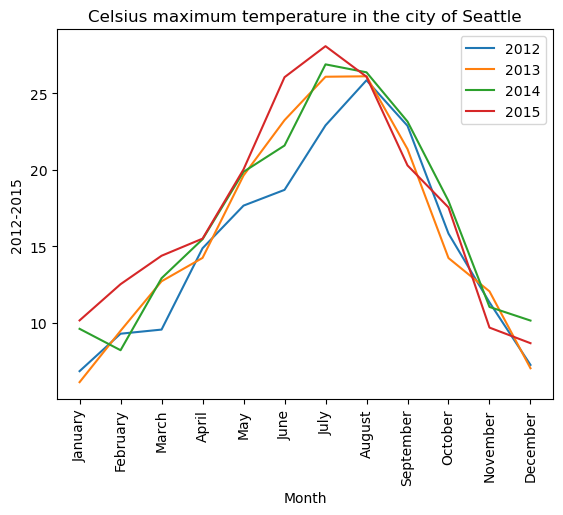

In [44]:
sns.lineplot(data=df_max, x='Month', y='2012', label='2012')
sns.lineplot(data=df_max, x='Month', y='2013', label='2013')
sns.lineplot(data=df_max, x='Month', y='2014', label='2014')
sns.lineplot(data=df_max, x='Month', y='2015', label='2015')
plt.xticks(rotation=90)
plt.title('Celsius maximum temperature in the city of Seattle')
plt.ylabel('2012-2015')
plt.show()


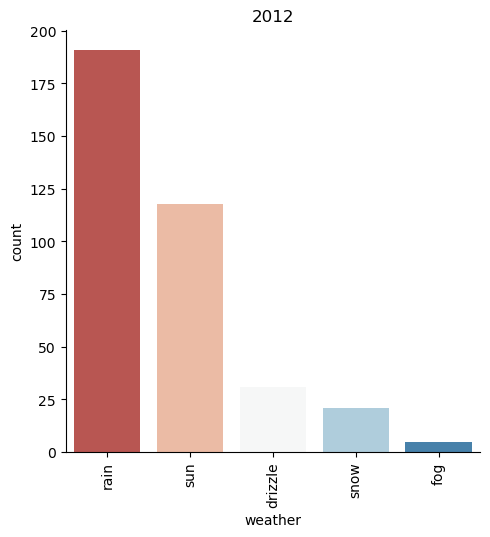

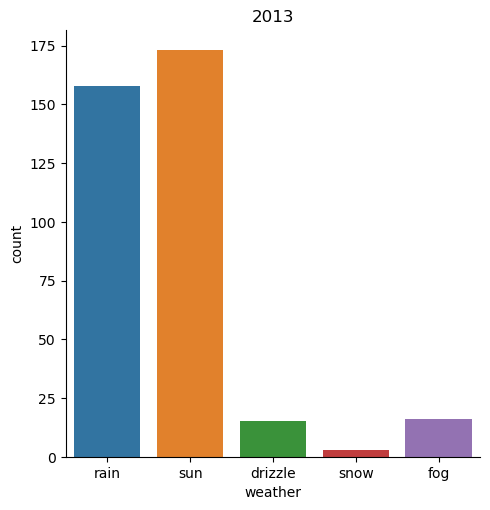

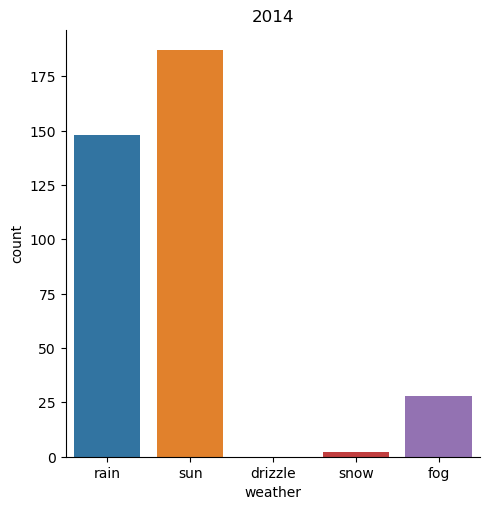

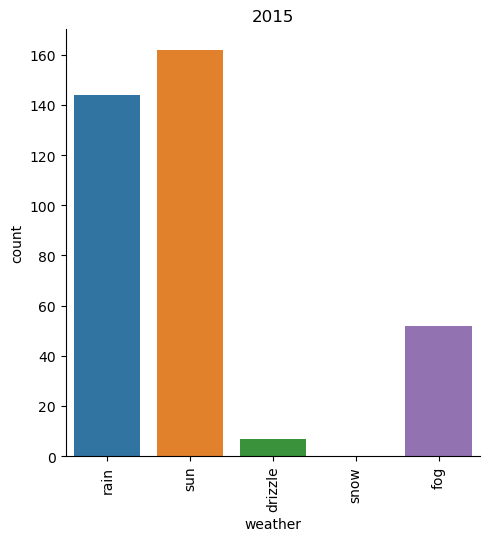

In [48]:
df_w12 = df[df['date'].dt.year == 2012]
df_w13 = df[df['date'].dt.year == 2013]
df_w14 = df[df['date'].dt.year == 2014]
df_w15 = df[df['date'].dt.year == 2015]
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
#sns.set_palette('RdBu')

#plt.subplot(1, 2, 1)
sns.catplot(x='weather', data=df_w12, kind='count',
            order=['rain', 'sun', 'drizzle', 'snow', 'fog'], palette='RdBu')#ax=ax1
plt.xticks(rotation=90)
plt.title('2012')

#plt.subplot(1, 2, 2)
sns.catplot(x='weather', data=df_w13, kind='count',
            order=['rain', 'sun', 'drizzle', 'snow', 'fog'])#ax=ax2
plt.title('2013')

#plt.subplot(2, 2, 1)
sns.catplot(x='weather', data=df_w14, kind='count',
            order=['rain', 'sun', 'drizzle', 'snow', 'fog'])
plt.title('2014')

#plt.subplot(2, 2, 2)
sns.catplot(x='weather', data=df_w15, kind='count',
            order=['rain', 'sun', 'drizzle', 'snow', 'fog'])
plt.title('2015')


plt.xticks(rotation=90)
plt.show()

In [47]:
df.head()

,date,temp_max,temp_min,precipitation,wind,weather
0,2012-01-01,12.8,5.0,0.0,4.7,drizzle
1,2012-01-02,10.6,2.8,10.9,4.5,rain
2,2012-01-03,11.7,7.2,0.8,2.3,rain
3,2012-01-04,12.2,5.6,20.3,4.7,rain
4,2012-01-05,8.9,2.8,1.3,6.1,rain
